In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import os
from dotenv import load_dotenv

from src.utilities.metrics_and_tests import gini
 

load_dotenv() 
path = os.environ['DATA_DIRECTORY']


True

In [4]:
# Load the Gini coefficients
gini_df = pd.read_csv(join(path, 'output/threshold/gini_coefficients.csv'))



In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from os.path import join

# # Assuming gini_df is already loaded
# # Calculate metrics and find the minimum mean difference for each token
# metrics = gini_df.groupby(['Token', 'Threshold'])['Gini Coefficient'].agg(['mean', 'std']).reset_index()
# metrics['mean_diff'] = metrics['mean'].diff(1).fillna(0)
# # metrics['mean_diff'] = metrics.groupby('Token')['mean_diff'].shift(-1)

# max_mean_diff = metrics.groupby('Token')['mean_diff'].idxmin()

# # Extract the corresponding thresholds
# thresholds_before_max = metrics.loc[max_mean_diff, ['Token', 'Threshold']].reset_index(drop=True)

# def plot_gini_coefficients(gini_df, threshold_df, path=''):
#     tokens = gini_df['Token'].unique()
#     num_tokens = len(tokens)
#     fig, axes = plt.subplots(num_tokens, 1, figsize=(12, num_tokens * 6))

#     for i, token in enumerate(tokens):
#         ax = axes[i] if num_tokens > 1 else axes
#         token_data = gini_df[gini_df['Token'] == token]
        
#         boxplot = token_data.boxplot(column='Gini Coefficient', by='Threshold', ax=ax, patch_artist=True)
        
#         # Get the threshold before max mean_diff for this token
#         threshold_before_max = threshold_df[threshold_df['Token'] == token]['Threshold'].values[0]
        
#         # Print the threshold for debugging
#         print(f"Token: {token}, Threshold before max mean_diff: {threshold_before_max}")
        
#         # Find the position of the threshold in the x-axis labels
#         positions = range(len(token_data['Threshold'].unique()))
#         threshold_positions = {val: idx for idx, val in zip(positions, sorted(token_data['Threshold'].unique()))}
        
#         ax.axvline(x=threshold_positions[threshold_before_max], color='r', linestyle='--', label='Threshold')
#         ax.legend()

#         ax.set_title(f'Gini Coefficient Distribution for Token {token}')
#         ax.set_xlabel('Threshold')
#         ax.set_ylabel('Gini Coefficient')
#         ax.grid(True)

#     plt.tight_layout()
#     plt.suptitle('')  # Suppress the default title to avoid overlap
#     plot_path = join(path, 'output/threshold/gini_coefficients_boxplot.png')
#     plt.show()
#     print(f'Plot saved to {plot_path}')

# # Example usage with gini_df and result DataFrames
# plot_gini_coefficients(gini_df, thresholds_before_max)


Token: 0x1f9840a85d5af5bf1d1762f925bdaddc4201f984, Threshold before crossing 0.5: 0.0122167734899679
Token: 0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9, Threshold before crossing 0.5: 0.0122167734899679
Token: 0x5a98fcbea516cf06857215779fd812ca3bef1b32, Threshold before crossing 0.5: 0.0076569880801242
Token: 0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2, Threshold before crossing 0.5: 0.0096717986429754
Token: 0xd533a949740bb3306d119cc777fa900ba034cd52, Threshold before crossing 0.5: 0.031099515499402
Token: 0x111111111117dc0aa78b770fa6a738034120c302, Threshold before crossing 0.5: 0.0194919402960285
Token: 0xc00e94cb662c3520282e6f5717214004a7f26888, Threshold before crossing 0.5: 0.0194919402960285
Token: 0xba100000625a3754423978a60c9317c58a424e3d, Threshold before crossing 0.5: 0.0122167734899679
Token: 0x6b3595068778dd592e39a122f4f5a5cf09c90fe2, Threshold before crossing 0.5: 0.0194919402960285
Token: 0x0bc529c00c6401aef6d220be8c6ea1667f6ad93e, Threshold before crossing 0.5: 0.00479909

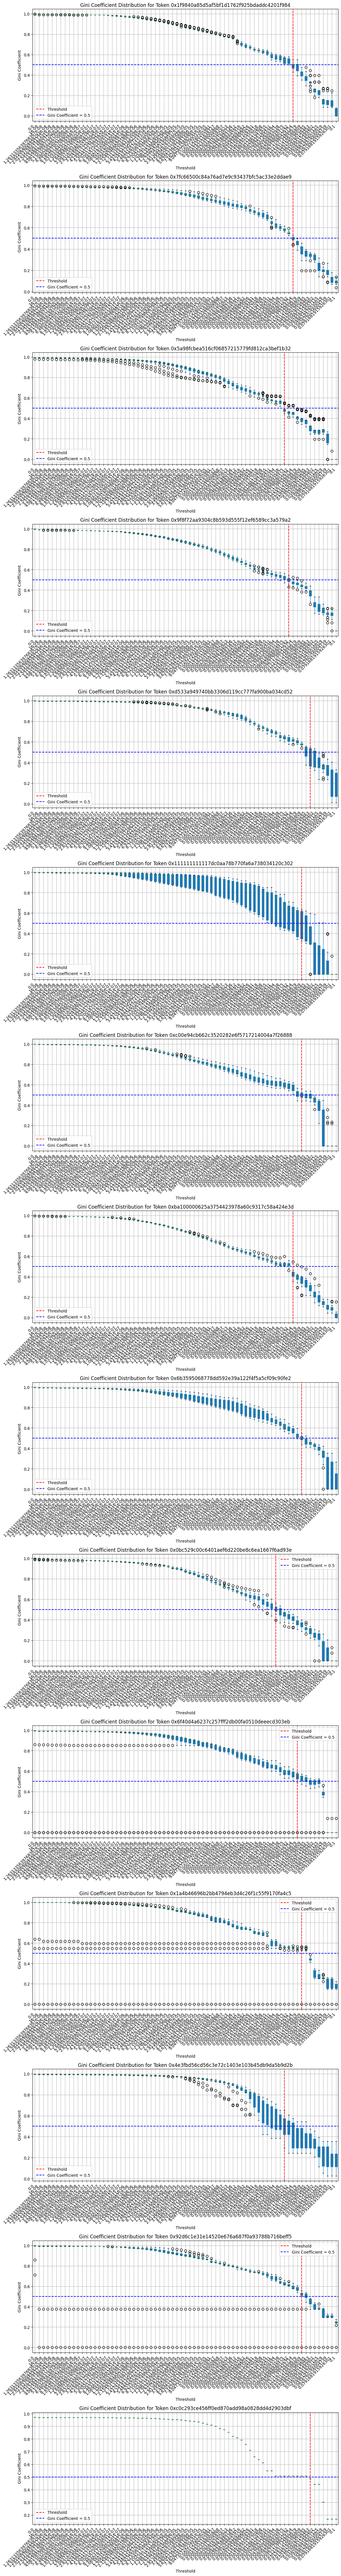

Plot saved to output/threshold/gini_coefficients_boxplot.png


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

# Sample data
# gini_df = pd.read_csv('path_to_gini_df.csv')

def find_threshold_before_crossing(df, crossing_value=0.5):
    mean_gini = df.groupby('Threshold')['Gini Coefficient'].mean().sort_values().reset_index()
    crossing_indices = mean_gini[mean_gini['Gini Coefficient'] < crossing_value].index
    
    if not crossing_indices.empty and crossing_indices.max() > 0:
        return mean_gini.loc[crossing_indices.max() -1, 'Threshold']
    else:
        return mean_gini.loc[0, 'Threshold']

def plot_gini_coefficients(gini_df, path=''):
    tokens = gini_df['Token'].unique()
    num_tokens = len(tokens)
    fig, axes = plt.subplots(num_tokens, 1, figsize=(12, num_tokens * 6))

    for i, token in enumerate(tokens):
        ax = axes[i] if num_tokens > 1 else axes
        token_data = gini_df[gini_df['Token'] == token]
        
        boxplot = token_data.boxplot(column='Gini Coefficient', by='Threshold', ax=ax, patch_artist=True)
        
        # Find the threshold before the Gini coefficient crosses 0.5 for this token
        threshold_before_crossing = find_threshold_before_crossing(token_data)
        
        # Print the threshold for debugging
        print(f"Token: {token}, Threshold before crossing 0.5: {threshold_before_crossing}")
        
        # Find the position of the threshold in the x-axis labels
        positions = range(len(token_data['Threshold'].unique()))
        threshold_positions = {val: idx for idx, val in zip(positions, sorted(token_data['Threshold'].unique()))}
        
        ax.axvline(x=threshold_positions[threshold_before_crossing], color='r', linestyle='--', label='Threshold')
        ax.axhline(y=0.5, color='b', linestyle='--', label='Gini Coefficient = 0.5')
        ax.legend()

        ax.set_title(f'Gini Coefficient Distribution for Token {token}')
        ax.set_xlabel('Threshold')
        ax.set_ylabel('Gini Coefficient')
        ax.grid(True)
        # Rotate x labels
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right")


    plt.tight_layout()
    plt.suptitle('')  # Suppress the default title to avoid overlap
    plot_path = join(path, 'output/threshold/gini_coefficients_boxplot.png')
    plt.show()
    print(f'Plot saved to {plot_path}')

# Example usage with gini_df DataFrame
plot_gini_coefficients(gini_df)


Token: 0x1f9840a85d5af5bf1d1762f925bdaddc4201f984, Threshold before crossing 0.5: 0.0122167734899679
Token: 0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9, Threshold before crossing 0.5: 0.0122167734899679
Token: 0x5a98fcbea516cf06857215779fd812ca3bef1b32, Threshold before crossing 0.5: 0.0076569880801242
Token: 0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2, Threshold before crossing 0.5: 0.0096717986429754
Token: 0xd533a949740bb3306d119cc777fa900ba034cd52, Threshold before crossing 0.5: 0.031099515499402
Token: 0x111111111117dc0aa78b770fa6a738034120c302, Threshold before crossing 0.5: 0.0194919402960285
Token: 0xc00e94cb662c3520282e6f5717214004a7f26888, Threshold before crossing 0.5: 0.0194919402960285
Token: 0xba100000625a3754423978a60c9317c58a424e3d, Threshold before crossing 0.5: 0.0122167734899679
Token: 0x6b3595068778dd592e39a122f4f5a5cf09c90fe2, Threshold before crossing 0.5: 0.0194919402960285
Token: 0x0bc529c00c6401aef6d220be8c6ea1667f6ad93e, Threshold before crossing 0.5: 0.00479909

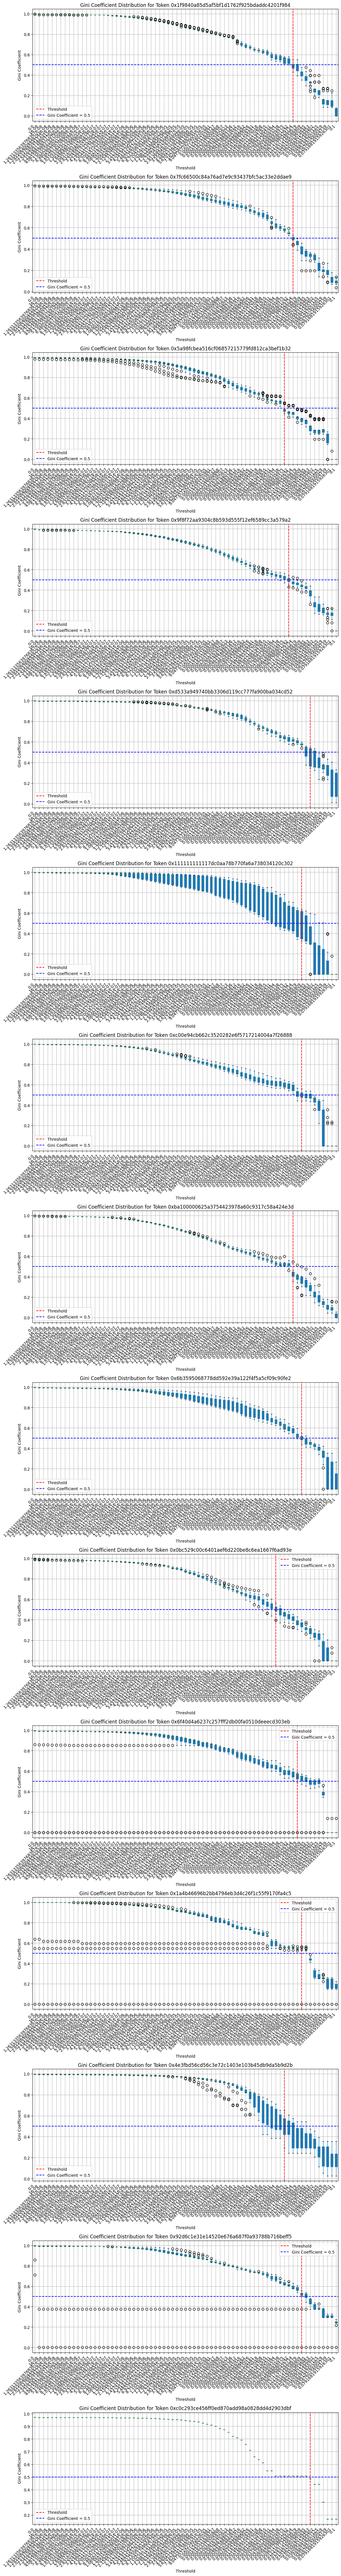

Plot saved to output/threshold/gini_coefficients_boxplot.png
Threshold data saved to output/threshold/threshold_before_crossing.csv


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

# Sample data
# gini_df = pd.read_csv('path_to_gini_df.csv')

CROSSING_VALUE = 0.5

def find_threshold_before_crossing(df, crossing_value=CROSSING_VALUE):
    mean_gini = df.groupby('Threshold')['Gini Coefficient'].mean().sort_values().reset_index()
    crossing_indices = mean_gini[mean_gini['Gini Coefficient'] < crossing_value].index
    
    if not crossing_indices.empty and crossing_indices.max() > 0:
        return mean_gini.loc[crossing_indices.max() - 1, 'Threshold']
    else:
        return mean_gini.loc[0, 'Threshold']

def plot_gini_coefficients(gini_df, path=''):
    tokens = gini_df['Token'].unique()
    num_tokens = len(tokens)
    fig, axes = plt.subplots(num_tokens, 1, figsize=(12, num_tokens * 6))

    threshold_data = []

    for i, token in enumerate(tokens):
        ax = axes[i] if num_tokens > 1 else axes
        token_data = gini_df[gini_df['Token'] == token]
        
        boxplot = token_data.boxplot(column='Gini Coefficient', by='Threshold', ax=ax, patch_artist=True)
        
        # Find the threshold before the Gini coefficient crosses 0.5 for this token
        threshold_before_crossing = find_threshold_before_crossing(token_data)
        
        # Store the threshold in the list
        threshold_data.append({'Token': token, 'Threshold Before Crossing': threshold_before_crossing})
        
        # Print the threshold for debugging
        print(f"Token: {token}, Threshold before crossing {CROSSING_VALUE}: {threshold_before_crossing}")
        
        # Find the position of the threshold in the x-axis labels
        positions = range(len(token_data['Threshold'].unique()))
        threshold_positions = {val: idx for idx, val in zip(positions, sorted(token_data['Threshold'].unique()))}
        
        ax.axvline(x=threshold_positions[threshold_before_crossing], color='r', linestyle='--', label='Threshold')
        ax.axhline(y=CROSSING_VALUE, color='b', linestyle='--', label=f'Gini Coefficient = {CROSSING_VALUE}')
        ax.legend()

        ax.set_title(f'Gini Coefficient Distribution for Token {token}')
        ax.set_xlabel('Threshold')
        ax.set_ylabel('Gini Coefficient')
        ax.grid(True)
        # Rotate x labels
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.suptitle('')  # Suppress the default title to avoid overlap
    plot_path = join(path, 'output/threshold/gini_coefficients_boxplot.png')
    plt.savefig(plot_path)
    plt.show()
    print(f'Plot saved to {plot_path}')
    
    # Save the threshold data to a CSV file
    threshold_df = pd.DataFrame(threshold_data)
    csv_path = join(path, 'output/threshold/threshold_before_crossing.csv')
    threshold_df.to_csv(csv_path, index=False)
    print(f'Threshold data saved to {csv_path}')

# Example usage with gini_df DataFrame
plot_gini_coefficients(gini_df)
